In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from fig_utils import papermode


In [2]:
# plt.rc("font", family="serif", serif="Times")
# size = 10
# plt.rc("text", usetex=True)
# plt.rc("xtick", labelsize=size)
# plt.rc("ytick", labelsize=size)
# plt.rc("axes", labelsize=size)
# plt.rc("figure", labelsize=size)
# plt.rc("legend", fontsize=size)
papermode(plt, size=8, has_latex=True)
# Load the data
data = pd.read_csv('results/phase3-test-M2F_METRICS.csv')
data

,PL_Version,experiment,F1,pAcc
0,NaN,SUPERVISED,0.1331,0.2959
1,V1,BASE,0.4382,0.5550
2,NaN,MovingWINDOW,0.4069,0.5262
3,V1,FINETUNE,0.4556,0.5970
4,V2,FINETUNE,0.3386,0.4524
5,V2,BASE,0.3785,0.4835


Text(0, 0.5, '$F1$ Score for drone test set (%)')

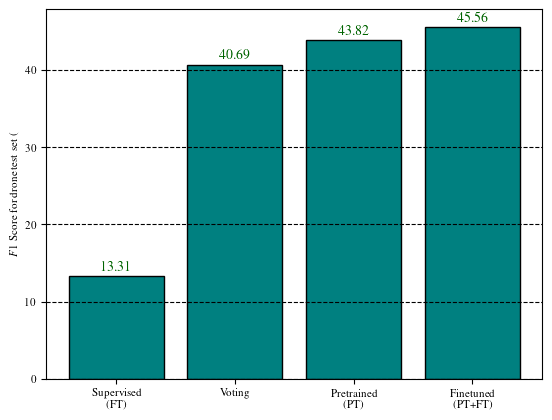

In [3]:
results_f1 = {
    'Supervised\n(FT)': data.iloc[0]['F1'],
    'Voting': data.iloc[2]['F1'],
    'Pretrained\n(PT)': data.iloc[1]['F1'],
    'Finetuned\n(PT+FT)': data.iloc[3]['F1'],
}

results_f1 = {k: round(v, 4) * 100 for k, v in results_f1.items()}

fig, ax = plt.subplots()
# plt.bar(results_f1.keys(), results_f1.values())
bars = ax.bar(results_f1.keys(), results_f1.values(), color="teal", edgecolor="black")
ax.bar_label(bars, color="darkgreen", padding=2)
# rotate labels
ax.grid(True, axis="y", color="k", zorder=0, linestyle="--")
# TO
# plt.xticks(rotation=45, ha="right")
ax.set_ylabel("$F1$ Score for drone test set (%)")
